<a href="https://colab.research.google.com/github/Ahmed-M-Elshazly/Homework-5/blob/main/Homework5_Problem1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Homework 5- Problem 1
#Ahmed Elshazly
#801420724

In [ ]:
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
def non_linear_model(t_u, w2, w1, b):
  return w2 * t_u ** 2 + w1 * t_u + b

In [ ]:
def linear_model(t_u, w, b):
  return w * t_u + b

In [ ]:
def loss_fn(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

In [ ]:
def train (n_epochs, model, optimizer, parameters, train_t_u, train_t_c, val_t_u, val_t_c):
  train_losses = []
  val_losses = []
  for epoch in range(n_epochs+1):
    train_t_p=model(train_t_u,*parameters)
    train_loss=loss_fn(train_t_p,train_t_c)

    with torch.no_grad():
      val_t_p=model(val_t_u,*parameters)
      val_loss=loss_fn(val_t_p,val_t_c)
      assert val_loss.requires_grad==False

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss.item())
    val_losses.append(val_loss.item())

    if epoch % 500==0:
      print(f"Epoch {epoch}, Training Loss {train_loss.item():.4f}, Validation Loss {val_loss.item():.4f} ")

  return parameters,train_losses, val_losses

In [ ]:
t_c = [0.5, 14.0, 15.0, 28.0, 11.0, 8.0, 3.0, -4.0, 6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

n_samples=t_u.shape[0]
n_val=int(0.2*n_samples)
shuffled_indices=torch.randperm(n_samples)

train_indices=shuffled_indices[ : -n_val]
val_indices=shuffled_indices[-n_val :]

train_t_u=t_u[train_indices]
train_t_c=t_c[train_indices]

val_t_u=t_u[val_indices]
val_t_c=t_c[val_indices]

train_t_un=0.1*train_t_u
val_t_un=0.1*val_t_u

In [ ]:
#Non_linear training_SGD
number_of_epochs=5000
learning_rates = [0.1, 0.01, 0.001, 0.0001]
for learning_rate in learning_rates:
  print(f"\nTraining with learning rate: {learning_rate}")
  parameters = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
  optimizer=optim.SGD([parameters], lr=learning_rate)
  trained_parameters, train_losses, val_losses=train(
      n_epochs=number_of_epochs,
      model=non_linear_model,
      optimizer=optimizer,
      parameters=parameters,
      train_t_u=train_t_un,
      train_t_c=train_t_c,
      val_t_u=val_t_un,
      val_t_c=val_t_c
  )
  print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")



Training with learning rate: 0.1
Epoch 0, Training Loss 659.6200, Validation Loss 748.5787 
Epoch 500, Training Loss nan, Validation Loss nan 
Epoch 1000, Training Loss nan, Validation Loss nan 
Epoch 1500, Training Loss nan, Validation Loss nan 
Epoch 2000, Training Loss nan, Validation Loss nan 
Epoch 2500, Training Loss nan, Validation Loss nan 
Epoch 3000, Training Loss nan, Validation Loss nan 
Epoch 3500, Training Loss nan, Validation Loss nan 
Epoch 4000, Training Loss nan, Validation Loss nan 
Epoch 4500, Training Loss nan, Validation Loss nan 
Epoch 5000, Training Loss nan, Validation Loss nan 
Final parameters with learning rate 0.1: tensor([nan, nan, nan], requires_grad=True)

Training with learning rate: 0.01
Epoch 0, Training Loss 659.6200, Validation Loss 748.5787 
Epoch 500, Training Loss nan, Validation Loss nan 
Epoch 1000, Training Loss nan, Validation Loss nan 
Epoch 1500, Training Loss nan, Validation Loss nan 
Epoch 2000, Training Loss nan, Validation Loss nan 
Ep

In [ ]:
#Non_linear training_Adam
learning_rates = [0.1, 0.01, 0.001, 0.0001]
for learning_rate in learning_rates:
  print(f"\nTraining with learning rate: {learning_rate}")
  parameters = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
  optimizer=optim.Adam([parameters], lr=learning_rate)
  trained_parameters, train_losses, val_losses=train(
      n_epochs=5000,
      model=non_linear_model,
      optimizer=optimizer,
      parameters=parameters,
      train_t_u=train_t_un,
      train_t_c=train_t_c,
      val_t_u=val_t_un,
      val_t_c=val_t_c
  )
  print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")




Training with learning rate: 0.1
Epoch 0, Training Loss 659.6200, Validation Loss 748.5787 
Epoch 500, Training Loss 3.0020, Validation Loss 2.0298 
Epoch 1000, Training Loss 2.6364, Validation Loss 1.8809 
Epoch 1500, Training Loss 2.3949, Validation Loss 1.7625 
Epoch 2000, Training Loss 2.2909, Validation Loss 1.6913 
Epoch 2500, Training Loss 2.2621, Validation Loss 1.6567 
Epoch 3000, Training Loss 2.2574, Validation Loss 1.6430 
Epoch 3500, Training Loss 2.2570, Validation Loss 1.6388 
Epoch 4000, Training Loss 2.2570, Validation Loss 1.6379 
Epoch 4500, Training Loss 2.2570, Validation Loss 1.6378 
Epoch 5000, Training Loss 2.2570, Validation Loss 1.6378 
Final parameters with learning rate 0.1: tensor([  0.2736,   2.4651, -10.4686], requires_grad=True)

Training with learning rate: 0.01
Epoch 0, Training Loss 659.6200, Validation Loss 748.5787 
Epoch 500, Training Loss 6.3952, Validation Loss 4.1287 
Epoch 1000, Training Loss 4.0682, Validation Loss 2.8319 
Epoch 1500, Trainin

In [ ]:
#linear training_SGD
learning_rates = [0.1, 0.01, 0.001, 0.0001]
for learning_rate in learning_rates:
  print(f"\nTraining with learning rate: {learning_rate}")
  parameters = torch.tensor([1.0, 0.0], requires_grad=True)
  optimizer=optim.SGD([parameters], lr=learning_rate)
  trained_parameters, train_losses, val_losses=train(
      n_epochs=5000,
      model=linear_model,
      optimizer=optimizer,
      parameters=parameters,
      train_t_u=train_t_un,
      train_t_c=train_t_c,
      val_t_u=val_t_un,
      val_t_c=val_t_c
  )
  print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")


Training with learning rate: 0.1
Epoch 0, Training Loss 74.8700, Validation Loss 105.0889 
Epoch 500, Training Loss nan, Validation Loss nan 
Epoch 1000, Training Loss nan, Validation Loss nan 
Epoch 1500, Training Loss nan, Validation Loss nan 
Epoch 2000, Training Loss nan, Validation Loss nan 
Epoch 2500, Training Loss nan, Validation Loss nan 
Epoch 3000, Training Loss nan, Validation Loss nan 
Epoch 3500, Training Loss nan, Validation Loss nan 
Epoch 4000, Training Loss nan, Validation Loss nan 
Epoch 4500, Training Loss nan, Validation Loss nan 
Epoch 5000, Training Loss nan, Validation Loss nan 
Final parameters with learning rate 0.1: tensor([nan, nan], requires_grad=True)

Training with learning rate: 0.01
Epoch 0, Training Loss 74.8700, Validation Loss 105.0889 
Epoch 500, Training Loss 7.3047, Validation Loss 7.0081 
Epoch 1000, Training Loss 3.7502, Validation Loss 3.6680 
Epoch 1500, Training Loss 3.2393, Validation Loss 2.6822 
Epoch 2000, Training Loss 3.1659, Validatio

In [ ]:
#linear training_Adam
learning_rates = [0.1, 0.01, 0.001, 0.0001]
for learning_rate in learning_rates:
  print(f"\nTraining with learning rate: {learning_rate}")
  parameters = torch.tensor([1.0, 0.0], requires_grad=True)
  optimizer=optim.Adam([parameters], lr=learning_rate)
  trained_parameters, train_losses, val_losses=train(
      n_epochs=5000,
      model=linear_model,
      optimizer=optimizer,
      parameters=parameters,
      train_t_u=train_t_un,
      train_t_c=train_t_c,
      val_t_u=val_t_un,
      val_t_c=val_t_c
  )
  print(f"Final parameters with learning rate {learning_rate}: {trained_parameters}")


Training with learning rate: 0.1
Epoch 0, Training Loss 74.8700, Validation Loss 105.0889 
Epoch 500, Training Loss 3.1630, Validation Loss 2.3285 
Epoch 1000, Training Loss 3.1536, Validation Loss 2.1562 
Epoch 1500, Training Loss 3.1536, Validation Loss 2.1562 
Epoch 2000, Training Loss 3.1536, Validation Loss 2.1562 
Epoch 2500, Training Loss 3.1536, Validation Loss 2.1562 
Epoch 3000, Training Loss 3.1536, Validation Loss 2.1562 
Epoch 3500, Training Loss 3.1536, Validation Loss 2.1562 
Epoch 4000, Training Loss 3.1536, Validation Loss 2.1562 
Epoch 4500, Training Loss 3.1536, Validation Loss 2.1562 
Epoch 5000, Training Loss 3.1536, Validation Loss 2.1562 
Final parameters with learning rate 0.1: tensor([  5.2486, -16.7779], requires_grad=True)

Training with learning rate: 0.01
Epoch 0, Training Loss 74.8700, Validation Loss 105.0889 
Epoch 500, Training Loss 24.6457, Validation Loss 18.1975 
Epoch 1000, Training Loss 14.4262, Validation Loss 12.0403 
Epoch 1500, Training Loss 8


Training with learning rate: 0.0001
Epoch 0, Training Loss 659.6200, Validation Loss 748.5787 
Epoch 500, Training Loss 11.4728, Validation Loss 6.2948 
Epoch 1000, Training Loss 9.0912, Validation Loss 5.1387 
Epoch 1500, Training Loss 7.4585, Validation Loss 4.3338 
Epoch 2000, Training Loss 6.3389, Validation Loss 3.7713 
Epoch 2500, Training Loss 5.5704, Validation Loss 3.3768 
Epoch 3000, Training Loss 5.0426, Validation Loss 3.0988 
Epoch 3500, Training Loss 4.6795, Validation Loss 2.9017 
Epoch 4000, Training Loss 4.4292, Validation Loss 2.7611 
Epoch 4500, Training Loss 4.2562, Validation Loss 2.6601 
Epoch 5000, Training Loss 4.1361, Validation Loss 2.5869 
Final parameters with learning rate 0.0001: tensor([ 0.5569, -0.9352, -0.9265], requires_grad=True)


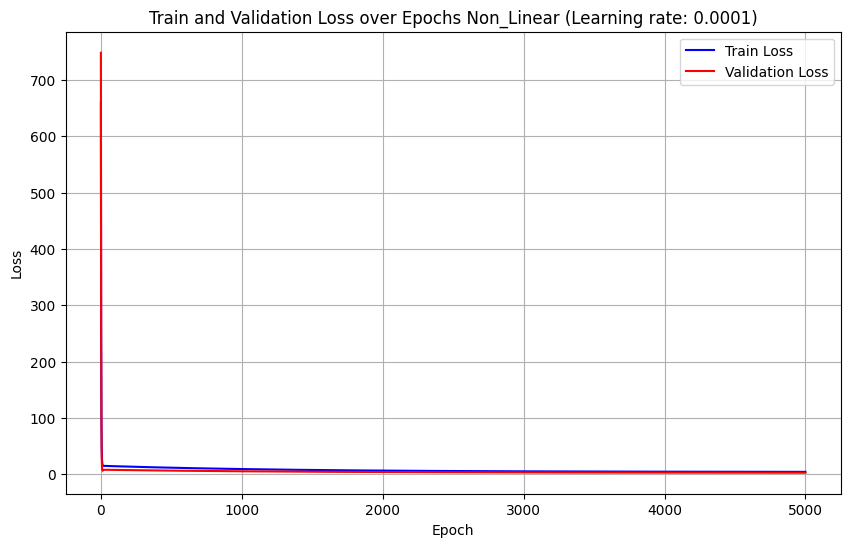


Training with learning rate: 0.01
Epoch 0, Training Loss 74.8700, Validation Loss 105.0889 
Epoch 500, Training Loss 7.3047, Validation Loss 7.0081 
Epoch 1000, Training Loss 3.7502, Validation Loss 3.6680 
Epoch 1500, Training Loss 3.2393, Validation Loss 2.6822 
Epoch 2000, Training Loss 3.1659, Validation Loss 2.3488 
Epoch 2500, Training Loss 3.1554, Validation Loss 2.2282 
Epoch 3000, Training Loss 3.1539, Validation Loss 2.1833 
Epoch 3500, Training Loss 3.1536, Validation Loss 2.1664 
Epoch 4000, Training Loss 3.1536, Validation Loss 2.1601 
Epoch 4500, Training Loss 3.1536, Validation Loss 2.1576 
Epoch 5000, Training Loss 3.1536, Validation Loss 2.1568 
Final parameters with learning rate 0.01: tensor([  5.2484, -16.7768], requires_grad=True)


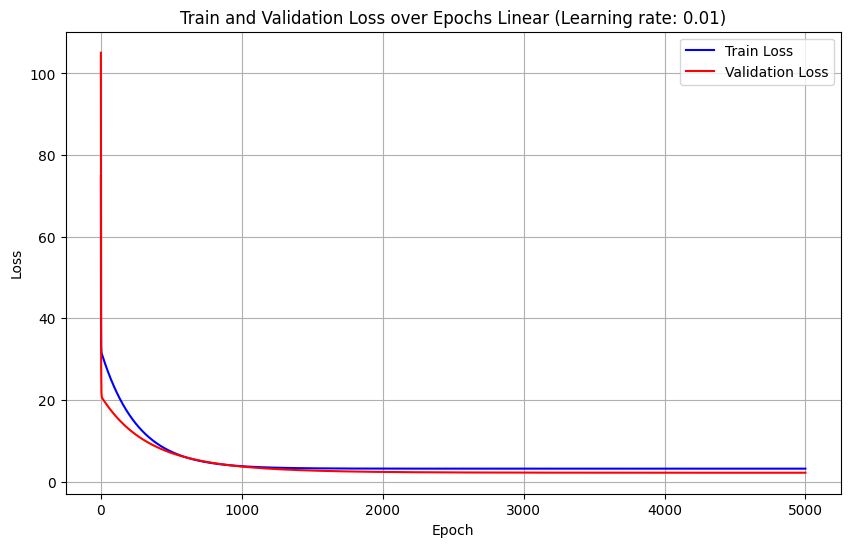

In [ ]:
#Compare_best_Nonlinear model with linear model SGD
#Non_linear training_SGD
number_of_epochs=5000
learning_rates = [0.0001]
for learning_rate in learning_rates:
  print(f"\nTraining with learning rate: {learning_rate}")
  parameters = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
  optimizer=optim.SGD([parameters], lr=learning_rate)
  trained_parameters_nonlin_sgd, train_losses_nonlin, val_losses_nonlin=train(
      n_epochs=number_of_epochs,
      model=non_linear_model,
      optimizer=optimizer,
      parameters=parameters,
      train_t_u=train_t_un,
      train_t_c=train_t_c,
      val_t_u=val_t_un,
      val_t_c=val_t_c
  )
  print(f"Final parameters with learning rate {learning_rate}: {trained_parameters_nonlin_sgd}")
  plt.figure(figsize=(10, 6))
  plt.plot(range(0, number_of_epochs+1), train_losses_nonlin, label='Train Loss', color='blue')
  plt.plot(range(0, number_of_epochs+1), val_losses_nonlin, label='Validation Loss', color='red')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title(f'Train and Validation Loss over Epochs Non_Linear (Learning rate: {learning_rate})')
  plt.legend()
  plt.grid(True)
  plt.show()

#linear training_SGD
number_of_epochs=5000
learning_rates = [0.01]
for learning_rate in learning_rates:
  print(f"\nTraining with learning rate: {learning_rate}")
  parameters = torch.tensor([1.0, 0.0], requires_grad=True)
  optimizer=optim.SGD([parameters], lr=learning_rate)
  trained_parameters_lin_sgd,train_losses_lin, val_losses_lin=train(
      n_epochs=number_of_epochs,
      model=linear_model,
      optimizer=optimizer,
      parameters=parameters,
      train_t_u=train_t_un,
      train_t_c=train_t_c,
      val_t_u=val_t_un,
      val_t_c=val_t_c
  )
  print(f"Final parameters with learning rate {learning_rate}: {trained_parameters_lin_sgd}")
  plt.figure(figsize=(10, 6))
  plt.plot(range(0, number_of_epochs+1), train_losses_lin, label='Train Loss', color='blue')
  plt.plot(range(0, number_of_epochs+1), val_losses_lin, label='Validation Loss', color='red')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title(f'Train and Validation Loss over Epochs Linear (Learning rate: {learning_rate})')
  plt.legend()
  plt.grid(True)
  plt.show()




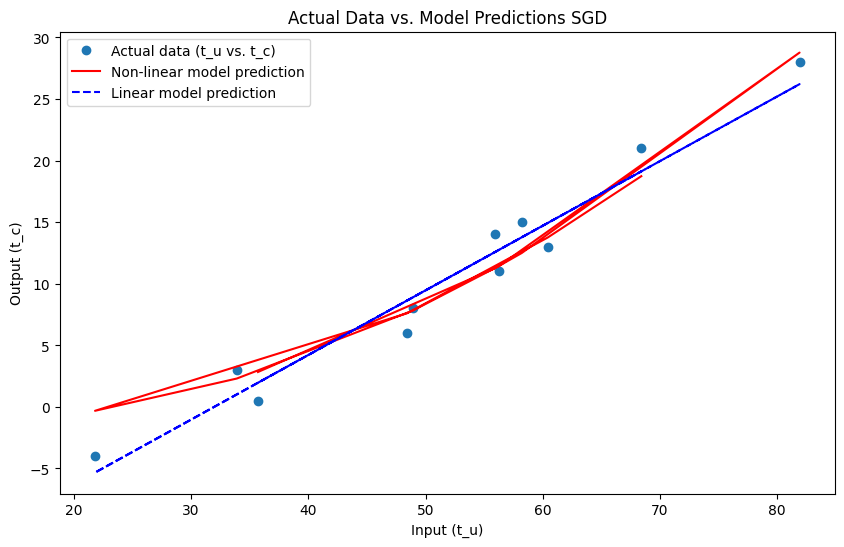

In [ ]:
non_lin_pred_sgd=non_linear_model(0.1*t_u,*trained_parameters_nonlin_sgd)
lin_pred_sgd=linear_model(0.1*t_u,*trained_parameters_lin_sgd)

plt.figure(figsize=(10, 6))
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label="Actual data (t_u vs. t_c)")
plt.plot(t_u.numpy(), non_lin_pred_sgd.detach().numpy(), 'r-', label="Non-linear model prediction")
plt.plot(t_u.numpy(), lin_pred_sgd.detach().numpy(), 'b--', label="Linear model prediction")

plt.xlabel("Input (t_u)")
plt.ylabel("Output (t_c)")
plt.legend()
plt.title("Actual Data vs. Model Predictions SGD")
plt.show()


Training with learning rate: 0.01
Epoch 0, Training Loss 659.6200, Validation Loss 748.5787 
Epoch 500, Training Loss 6.3952, Validation Loss 4.1287 
Epoch 1000, Training Loss 4.0682, Validation Loss 2.8319 
Epoch 1500, Training Loss 3.3362, Validation Loss 2.2994 
Epoch 2000, Training Loss 3.1876, Validation Loss 2.1366 
Epoch 2500, Training Loss 3.1191, Validation Loss 2.0814 
Epoch 3000, Training Loss 3.0433, Validation Loss 2.0480 
Epoch 3500, Training Loss 2.9548, Validation Loss 2.0135 
Epoch 4000, Training Loss 2.8550, Validation Loss 1.9742 
Epoch 4500, Training Loss 2.7470, Validation Loss 1.9301 
Epoch 5000, Training Loss 2.6363, Validation Loss 1.8827 
Final parameters with learning rate 0.01: tensor([ 0.4426,  0.6341, -5.9653], requires_grad=True)


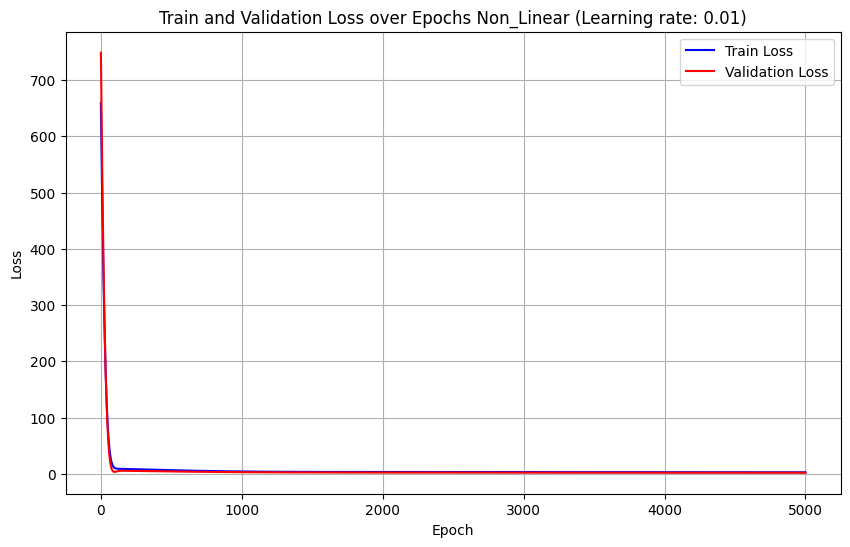


Training with learning rate: 0.01
Epoch 0, Training Loss 74.8700, Validation Loss 105.0889 
Epoch 500, Training Loss 24.6457, Validation Loss 18.1975 
Epoch 1000, Training Loss 14.4262, Validation Loss 12.0403 
Epoch 1500, Training Loss 8.2538, Validation Loss 7.8822 
Epoch 2000, Training Loss 5.0632, Validation Loss 5.2243 
Epoch 2500, Training Loss 3.7059, Validation Loss 3.6382 
Epoch 3000, Training Loss 3.2660, Validation Loss 2.7766 
Epoch 3500, Training Loss 3.1679, Validation Loss 2.3684 
Epoch 4000, Training Loss 3.1546, Validation Loss 2.2107 
Epoch 4500, Training Loss 3.1536, Validation Loss 2.1657 
Epoch 5000, Training Loss 3.1536, Validation Loss 2.1571 
Final parameters with learning rate 0.01: tensor([  5.2483, -16.7761], requires_grad=True)


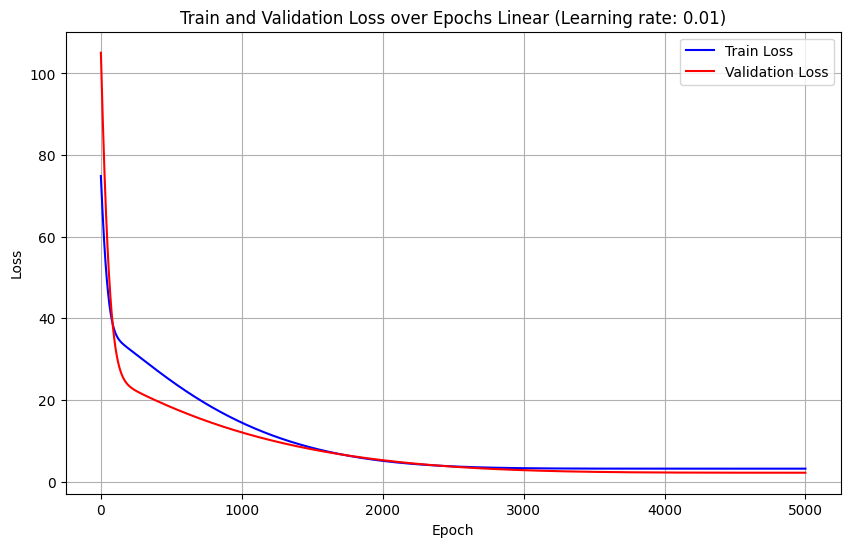

In [ ]:
#Compare_best_Nonlinear model with linear model Adam
#Non_linear training_Adam
number_of_epochs=5000
learning_rates = [0.01]
for learning_rate in learning_rates:
  print(f"\nTraining with learning rate: {learning_rate}")
  parameters = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
  optimizer=optim.Adam([parameters], lr=learning_rate)
  trained_parameters_nonlin_adam, train_losses_nonlin_adam, val_losses_nonlin_adam=train(
      n_epochs=number_of_epochs,
      model=non_linear_model,
      optimizer=optimizer,
      parameters=parameters,
      train_t_u=train_t_un,
      train_t_c=train_t_c,
      val_t_u=val_t_un,
      val_t_c=val_t_c
  )
  print(f"Final parameters with learning rate {learning_rate}: {trained_parameters_nonlin_adam}")
  plt.figure(figsize=(10, 6))
  plt.plot(range(0, number_of_epochs+1), train_losses_nonlin_adam, label='Train Loss', color='blue')
  plt.plot(range(0, number_of_epochs+1), val_losses_nonlin_adam, label='Validation Loss', color='red')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title(f'Train and Validation Loss over Epochs Non_Linear (Learning rate: {learning_rate})')
  plt.legend()
  plt.grid(True)
  plt.show()

#linear training_Adam
number_of_epochs=5000
learning_rates = [0.01]
for learning_rate in learning_rates:
  print(f"\nTraining with learning rate: {learning_rate}")
  parameters = torch.tensor([1.0, 0.0], requires_grad=True)
  optimizer=optim.Adam([parameters], lr=learning_rate)
  trained_parameters_lin_adam, train_losses_lin_adam, val_losses_lin_adam=train(
      n_epochs=number_of_epochs,
      model=linear_model,
      optimizer=optimizer,
      parameters=parameters,
      train_t_u=train_t_un,
      train_t_c=train_t_c,
      val_t_u=val_t_un,
      val_t_c=val_t_c
  )
  print(f"Final parameters with learning rate {learning_rate}: {trained_parameters_lin_adam}")
  plt.figure(figsize=(10, 6))
  plt.plot(range(0, number_of_epochs+1), train_losses_lin_adam, label='Train Loss', color='blue')
  plt.plot(range(0, number_of_epochs+1), val_losses_lin_adam, label='Validation Loss', color='red')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.title(f'Train and Validation Loss over Epochs Linear (Learning rate: {learning_rate})')
  plt.legend()
  plt.grid(True)
  plt.show()



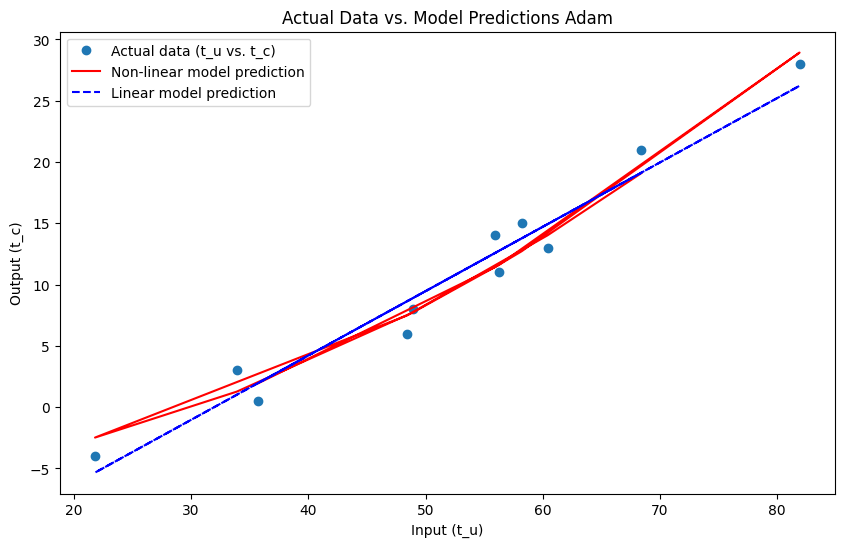

In [ ]:
non_lin_pred_adam=non_linear_model(0.1*t_u,*trained_parameters_nonlin_adam)
lin_pred_adam=linear_model(0.1*t_u,*trained_parameters_lin_adam)

plt.figure(figsize=(10, 6))
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label="Actual data (t_u vs. t_c)")
plt.plot(t_u.numpy(), non_lin_pred_adam.detach().numpy(), 'r-', label="Non-linear model prediction")
plt.plot(t_u.numpy(), lin_pred_adam.detach().numpy(), 'b--', label="Linear model prediction")

plt.xlabel("Input (t_u)")
plt.ylabel("Output (t_c)")
plt.legend()
plt.title("Actual Data vs. Model Predictions Adam")
plt.show()